# KNN
knn intro: https://www.cnblogs.com/fengfenggirl/archive/2013/05/27/knn.html

In [1]:
import numpy as np
import pandas as pd
from pandas import concat
final_data = pd.read_csv("processed_data.csv")
unsplited_data = final_data.iloc[:, [1, 2, 3, 0]]
train_data = final_data.iloc[:49046, [1, 2, 3, 0]]
test_data = concat([final_data.iloc[0:0, [1, 2 , 3, 0]], final_data.iloc[49047:, [1 , 2, 3, 0]]])
print(train_data[:10])

              userid     entityName               type body
0    878293195646842       Bio Cafe  point_of_interest    🌮
1    878293195646842       Bio Cafe      establishment    🌮
2    878293195646842       Bio Cafe  point_of_interest    🌮
3    878293195646842       Bio Cafe      establishment    🌮
4  10212886863311893  Lao sze chuan  point_of_interest    🐔
5  10212886863311893  Lao sze chuan      establishment    🐔
6  10212886863311893  Lao sze chuan  point_of_interest    🍗
7  10212886863311893  Lao sze chuan      establishment    🍗
8  10212886863311893  Lao sze chuan  point_of_interest    😍
9  10212886863311893  Lao sze chuan      establishment    😍


In [2]:
unsplited_data

,userid,entityName,type,body
0,878293195646842,Bio Cafe,point_of_interest,🌮
1,878293195646842,Bio Cafe,establishment,🌮
2,878293195646842,Bio Cafe,point_of_interest,🌮
3,878293195646842,Bio Cafe,establishment,🌮
4,10212886863311893,Lao sze chuan,point_of_interest,🐔
5,10212886863311893,Lao sze chuan,establishment,🐔
6,10212886863311893,Lao sze chuan,point_of_interest,🍗
7,10212886863311893,Lao sze chuan,establishment,🍗
8,10212886863311893,Lao sze chuan,point_of_interest,😍
9,10212886863311893,Lao sze chuan,establishment,😍


In [3]:
data = unsplited_data[1:].values
np.random.shuffle(data)

In [4]:
data[:10]

array([['1696995083646520', 'Hard Eight BBQ', 'establishment', '🐮'],
       ['10155200088205955', 'Hunan West', 'establishment', '️'],
       ['10212391291791338', 'Hunan Impression', 'establishment', '🥘'],
       ['1568817893208858', 'University of Illinois Campus Recreation',
        'establishment', '🎧'],
       ['10214788409806965', '20 OZ Tea', 'point_of_interest', '➖'],
       ['1517874618267474', 'Bodegas Rosell', 'establishment', '🥓'],
       ['10213431934147283', 'Burrito King', 'establishment', '🐮'],
       ['688430868030100', 'Shiquan', 'point_of_interest', '🥘'],
       ['10155200088205955',
        'Restaurant Umami by Michel Roth - Hôtel Président Wilson',
        'establishment', '☔'],
       ['10212886863311893', 'Live Latitude', 'point_of_interest', '🏃']],
      dtype=object)

In [5]:
import hashlib
d1 = {}
def md5_1(s): 
    h = int(hashlib.md5(s.encode()).hexdigest(),16) / 1e29
    d1[h] = s  
    return h
d2 = {}
def md5_2(s): 
    h = int(hashlib.md5(s.encode()).hexdigest(),16) / 1e28
    d2[h] = s  
    return h 

In [6]:
a= data[::, :-1].tolist()
b= data[::, -1:].tolist()
a_ = []
for l in a:
    t = []
    for i in range(3): t.append(md5_1(l[i]))
    a_.append(t)
a = a_
b = [md5_2(item) for l in b for item in l]
x = np.asarray(a,dtype ='float64').reshape(-1,3)
y = np.asarray(b,dtype ='int64')
print(x[:10],'\n\n', y[:10])

[[2.91897336e+09 1.24293569e+09 3.24878142e+09]
 [2.61205105e+09 2.59803743e+09 3.24878142e+09]
 [1.57803717e+09 3.68515243e+08 3.24878142e+09]
 [2.99239716e+09 1.93728040e+09 3.24878142e+09]
 [1.12930280e+09 3.35956690e+09 7.49855338e+08]
 [2.43607811e+09 2.36098567e+09 3.24878142e+09]
 [1.62827684e+09 9.50065703e+07 3.24878142e+09]
 [1.34716876e+09 7.51058283e+08 7.49855338e+08]
 [2.61205105e+09 2.83167141e+09 3.24878142e+09]
 [1.64930001e+09 6.74957561e+08 7.49855338e+08]] 

 [ 3405763049 33509426137 18813743299 14872340000 27399538896 15185149400
  3405763049 18813743299 18183258956 21263262544]


In [7]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import copy
accuracy = 0
k = 0
x_ = copy.deepcopy(x)
y_ = copy.deepcopy(y)
import time
timeout = time.time() + 90   # 90s from now
while accuracy < 0.99:
    k += 3000
    x3_train, x3_test, y3_train, y3_test = train_test_split(x_[:k], y_[:k], random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(x3_train, y3_train)
    accuracy = knn.score(x_[:k], y_[:k]) 
    print(accuracy)
    knn_predictions = knn.predict(x_[:k])
    y_[:len(knn_predictions)] = knn_predictions
    if k + 3000 >= len(x_):
        x_ = np.concatenate((x_[k:], x_[:k]), axis=0) 
        y_ = np.concatenate((y_[k:], y_[:k]), axis=0) 
        k = 3000
    if time.time() > timeout: break

0.6766666666666666
0.6825
0.7225555555555555
0.756
0.7808666666666667
0.8056111111111111
0.8268571428571428
0.8435833333333334
0.8586666666666667
0.8703
0.8753939393939394
0.8784444444444445
0.8905897435897436
0.8969285714285714
0.8991777777777777
0.9049375
0.909607843137255
0.9155
0.9197368421052632
0.9229833333333334
0.9268095238095239
0.9305606060606061
0.9304202898550724
0.9362222222222222
0.7378333333333333
0.8438888888888889
0.8765833333333334
0.904
0.9181666666666667
0.9236666666666666
0.937125
0.948037037037037
0.9530333333333333
0.9586666666666667
0.9627222222222223
0.9647692307692308
0.9680714285714286
0.9722
0.9762708333333333
0.9775490196078431
0.979037037037037
0.9812280701754386
0.9837166666666667
0.9836825396825397
0.9850151515151515
0.9873188405797102
0.9870555555555556
0.8463333333333334
0.8828888888888888
0.90075
0.9194
0.9295555555555556
0.9437142857142857
0.9499166666666666
0.9585555555555556
0.9603666666666667
0.9646969696969697
0.97025
0.976051282051282
0.97678571

In [8]:
# confusion matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
labels = list(d2.values())
knn_predictions = knn.predict(x_)  
cm5 = confusion_matrix(y_, knn_predictions) 
# knn_predictions = knn.predict(x)  
# cm5 = confusion_matrix(y, knn_predictions)

In [9]:
print(y_, knn_predictions)
# print(y, knn_predictions)

[21354989949 33714270391  1024980656 ... 26642082366  4997701839
 26212292117] [21354989949 33714270391  1024980656 ...  1401554668  4997701839
 26212292117]


In [10]:
print(x.shape,y.shape, type(x[0][0]), type(y[0]))
print(y_.shape, knn_predictions.shape)
l5 = cm5.tolist()
print(len(l5))
c5 = 0
c6 = 0
out = []
for i in range(len(l5)):
    mx_i = l5[i][i]
    mx = 0 
    for j in range(len(l5[i])): mx = max(l5[i][j],mx)
    if mx_i == mx:
        c5 += 1
        c6 += mx
        out.append((i,mx))
#         if l5[i][i] > 1097: print(l5[i][i], mx, i)
#         print(i, l5[i][i], mx)

(73567, 3) (73567,) <class 'numpy.float64'> <class 'numpy.int64'>
(73567,) (73567,)
850


In [11]:
print(c5, len(l5))
print('matrix accuracy = ', c5/len(l5))
print(c6, len(y_))
print('orginal accuracy = ', c6/len(y_))

837 850
matrix accuracy =  0.9847058823529412
72912 73567
orginal accuracy =  0.9910965514429024


In [12]:
accuracy1 = knn.score(x, y) 
print('original score = ', accuracy1)
accuracy2 = knn.score(x_, y_) 
print('copy training phase score = ', accuracy2)

original score =  0.13205649272092107
copy training phase score =  0.9910965514429024


In [13]:
print(out[:10])

[(0, 25), (1, 47), (2, 151), (3, 100), (4, 7), (5, 42), (6, 15), (7, 1518), (8, 5), (9, 1496)]


In [14]:
print(len(out),len(labels))
print(out[8])
for i in range(10):
    print("%d:%s:%r" % (i, labels[out[i][0]].center(1), out[i][0] == out[i][1]) ) 

837 1097
(8, 5)
0:🐮:False
1:️:False
2:🥘:False
3:🎧:False
4:➖:False
5:🥓:False
6:☔:False
7:🏃:False
8:🍋:False
9:🤣:False


In [15]:
c1 = 0
for v in y_- knn_predictions:
    if v == 0: c1 += 1
print('orginal accuracy= ', c1/len(y_))

orginal accuracy=  0.9910965514429024


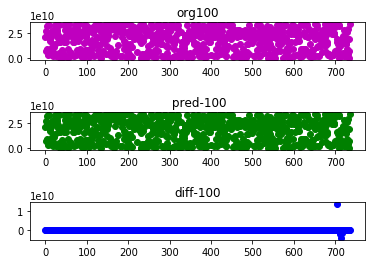

In [39]:
from matplotlib import pyplot as plt
plt.figure()
plt.title('Figure1')
plt.subplot(511)
plt.title('org100')
plt.plot(y_[::100], 'mo')
plt.subplot(513)
plt.title(' pred-100')
plt.plot(knn_predictions[::100], 'go')
plt.subplot(515)
plt.title('diff-100')
plt.plot(y_[::100] - knn_predictions[::100], 'bo')
plt.show()

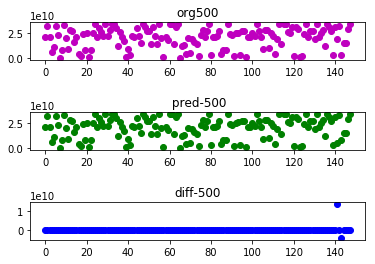

In [40]:
plt.figure()
plt.title('Figure1')
plt.subplot(511)
plt.title('org500')
plt.plot(y_[::500], 'mo')
plt.subplot(513)
plt.title(' pred-500')
plt.plot(knn_predictions[::500], 'go')
plt.subplot(515)
plt.title('diff-500')
plt.plot(y_[::500] - knn_predictions[::500], 'bo')
plt.show()

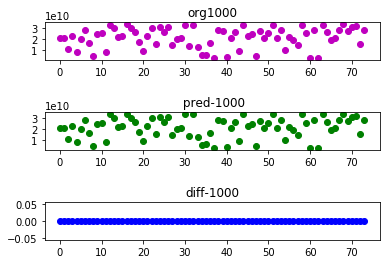

In [37]:
plt.figure()
plt.title('Figure1')
plt.subplot(511)
plt.title('org1000')
plt.plot(y_[::1000], 'mo')
plt.subplot(513)
plt.title(' pred-1000')
plt.plot(knn_predictions[::1000], 'go')
plt.subplot(515)
plt.title('diff-1000')
plt.plot(y_[::1000] - knn_predictions[::1000], 'bo')
plt.show()

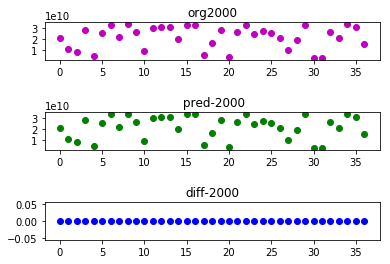

In [38]:
plt.figure()
plt.title('Figure1')
plt.subplot(511)
plt.title('org2000')
plt.plot(y_[::2000], 'mo')
plt.subplot(513)
plt.title(' pred-2000')
plt.plot(knn_predictions[::2000], 'go')
plt.subplot(515)
plt.title('diff-2000')
plt.plot(y_[::2000] - knn_predictions[::2000], 'bo')
plt.show()

In [17]:
# Unpassed raw data
knn_predictions0 = knn.predict(x)
c2 = 0
for v in y - knn_predictions0:
    if v == 0: c2 += 1
print('orginal accuracy0= ', c2/len(y))

orginal accuracy0=  0.13205649272092107
